In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, random
from collections import deque
from scipy.stats import norm
from scipy.stats import binom, poisson, expon, geom
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm, ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import chi2, chi2_contingency, chisquare
from scipy.stats import f_oneway as anova_1way

from scipy.stats import kruskal # numeric Vs catogerical
from scipy.stats import pearsonr, spearmanr # numeric Vs numeric
from scipy.stats import kstest # cdf
from scipy.stats import levene
from scipy.stats import norm

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples
from scipy.stats import skew, shapiro #[Test for normality]
import re

<strong>Problem Statement</strong>

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, <strong><mark>focused on profiling the best companies and job positions to work for from the Scaler database.</mark></strong> You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.


`Data Dictionary:`

- ‘Unnamed 0’- Index of the dataset<br>
- Email_hash- Anonymised Personal Identifiable Information (PII)<br>
- Company_hash- Current employer of the learner<br>
- <mark>orgyear</mark>- `Employment start date`<br>
- CTC- Current CTC<br>
- Job_position- Job profile in the company<br>
- CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)<br>


`Concept Used:`
- Manual Clustering
- Unsupervised Clustering - K- means, Hierarchical Clustering


`What does “good” look like?`

- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
- <mark>Checking unique emails and frequency of occurrence of the same email hash in the data.</mark> Recording observation and inference, wherever necessary.
- `Checking for missing values and Prepare data for KNN/ Mean Imputation.`
- <mark>You may have to remove special characters from the dataset by using Regex</mark>
    - Don’t worry if you haven’t used that before. The syntax is quite simple and intuitive
    - Code:<br>
        `mystring='\tAirtel X Labs'`<br>
        `re.sub('[^A-Za-z0-9 ]+', '', mystring)`<br>
- Checking for duplicates in the dataset and drop them
- `Making some new features like adding ‘Years of Experience’ column by subtracting orgyear from current year`
- <strong>Manual Clustering</strong> <mark>on the basis of learner’s company, job position and years of experience</mark>
    - `Getting the 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position, Years of Experience`
    - <mark>Merging the same with original dataset carefully and creating some flags showing learners with CTC greater than the Average of their Company’s department having same Years of Experience - Call that flag designation with values [1,2,3]</mark>
    - `Doing above analysis at Company & Job Position level. Name that flag Class with values [1,2,3]`
    - <mark>Repeating the same analysis at the Company level. Name that flag Tier with values [1,2,3]</mark>
- <strong>Based on the manual clustering done so far, answering few questions like:</strong>
    - `Top 10 employees (earning more than most of the employees in the company) - Tier 1`
        - <mark>Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1</mark>
        - `Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3`
    - <mark>Bottom 10 employees (earning less than most of the employees in the company)- Tier 3</mark>
    - `Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X`
    - <mark>Top 10 companies (based on their CTC)</mark>
    - `Top 2 positions in every company (based on their CTC)`
- <mark><strong>Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data</strong></mark>
- `Unsupervised Learning - Clustering`
    - <mark>Checking clustering tendency</mark>
    - `Elbow method`
    - <mark>K-means clustering</mark>
    - `Hierarchical clustering (you can do this on a sample of the dataset if your process is taking time)`
- <mark>Insights from Unsupervised Clustering</mark>
- Provide actionable Insights & Recommendations for the Business.

`Evaluation Criteria (100 Points):`

- <mark>Define Problem Statement and perform Exploratory Data Analysis</mark> `(10 points)`
    - Definition of problem (as per given problem statement with additional views)
    - Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
    - Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
    - Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
    - Illustrate the insights based on EDA
        - Comments on range of attributes, outliers of various attributes
        - Comments on the distribution of the variables and relationship between them
        - Comments for each univariate and bivariate plots
- <mark>Data Pre-processing:</mark> `(30 Points)`
    - Mean/ KNN Imputation
    - Regex for cleaning company names
    - Standardization & Encoding
- <mark>Manual Clustering:</mark> `(30 Points)`
    - Creating Designation Flag & Insights
    - Creating Class Flag & Insights
    - Creating Tier Flag & Insights
- <mark>Unsupervised learning:</mark> `(20 Points)`
    - Checking clustering tendency, Elbow method & K- means clustering
    - Hierarchical Clustering
- <mark>Actionable Insights & Recommendations</mark> `(10 Points)`

- Submission Process:

    - Type your insights and recommendations in the text editor.
    - Convert your jupyter notebook into PDF (Save as PDF using Chrome browser’s Print command), upload it in your Google Drive (set the permission to allow public access), and paste that link in the text editor.
    - Optionally, you may add images/graphs in the text editor by taking screenshots or saving matplotlib graphs using plt.savefig(...).
    - After submitting, you will not be allowed to edit your submission.

# Business Case -  Scaler - Clustering

**INDEX**
- **(A) Problem Statements**
- **(B) shape, null values and duplicates**
- **(C) Column Profiling / Feature engineering**
- **(D) Manual Clustering**
- **(E) Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data**
- **(F) KMeans clustering**
- **(G) Hierarchical clusterinng**
- **(H) observations and Recommendations**

# (A) Problem Statements

```
profiling the best companies and job positions to work for from the Scaler database
```

# (B) shape, null values and duplicates  

In [2]:
Data = pd.read_csv("D:\Python programmes\Data Collection\scaler_clustering.csv")

In [3]:
df = Data.copy(deep=True)

In [4]:
df.shape

(205843, 7)

In [5]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [6]:
df=df.drop(columns=["Unnamed: 0"],inplace=False)

In [7]:
df.shape

(205843, 6)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,205757.0,2.014883e+03,6.357112e+01,0.0,2013.0,2016.0,2018.0,2.016500e+04
ctc,205843.0,2.271685e+06,1.180091e+07,2.0,530000.0,950000.0,1700000.0,1.000150e+09
ctc_updated_year,205843.0,2.019628e+03,1.325104e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


In [9]:
df.describe(include="object")

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


#### percentage data missing in each columns

In [11]:
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [12]:
df.isnull().sum()/df.shape[0]*100

company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

In [13]:
df = df.dropna(inplace=False)

#### percentage row having null values

In [14]:
p = 1-df.dropna(inplace=False).shape[0]/len(df)
print(p*100,"% rows have null values")

0.0 % rows have null values


### remove duplicate rows

In [15]:
df.duplicated().sum()

18

In [16]:
df = df.drop_duplicates(keep="first", inplace=False)

In [17]:
df.duplicated().sum()

0

# (C) Column Profiling / Feature engineering

### column: orgyear

In [18]:
df[(df["orgyear"]<1900) | (df["orgyear"]>2023)]["orgyear"].value_counts()

2024.0    34
2025.0     9
2026.0     7
3.0        6
2029.0     5
0.0        5
2031.0     4
2028.0     3
6.0        2
2.0        2
5.0        2
1.0        2
2204.0     1
201.0      1
38.0       1
4.0        1
83.0       1
2027.0     1
91.0       1
200.0      1
Name: orgyear, dtype: int64

In [19]:
df = df[(df["orgyear"]>=1970) & (df["orgyear"]<=2023)]

In [20]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,153098.000000,1.530980e+05,153098.000000
mean,2014.765732,2.361667e+06,2019.504233
std,4.275717,1.185349e+07,1.324790
min,1970.000000,2.000000e+00,2015.000000
25%,2013.000000,5.700000e+05,2019.000000
50%,2016.000000,1.000000e+06,2020.000000
75%,2018.000000,1.720000e+06,2021.000000
max,2023.000000,2.000000e+08,2021.000000


### column: ctc

<AxesSubplot:xlabel='ctc'>

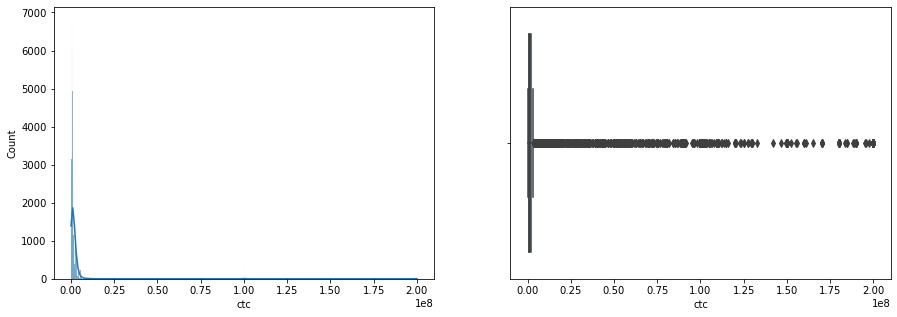

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=df["ctc"], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=df["ctc"])

<AxesSubplot:xlabel='ctc'>

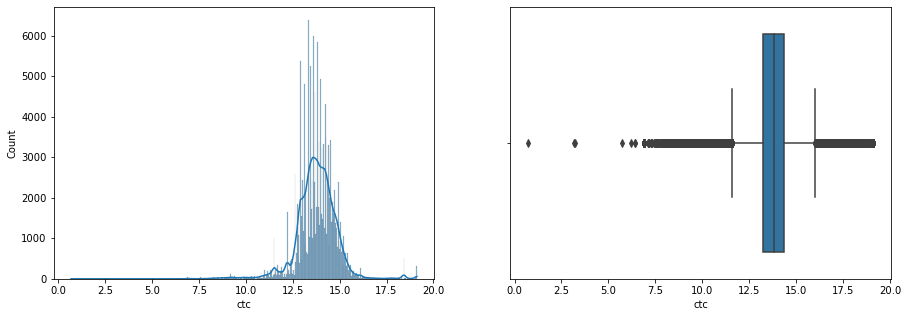

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=np.log(df["ctc"]), kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=np.log(df["ctc"]))

### removing outliers in ctc

In [23]:
df = df[(df["ctc"]>df["ctc"].quantile(0.025))&(df["ctc"]<df["ctc"].quantile(0.975))]

### column: job_position

In [24]:
df["job_position"]=df["job_position"].str.lower().str.replace(r"([^A-Za-z\s])|(\si+$)|(senior\s+)|(development\s+)|(associate\s+)|(member\s+of)|(member\s+)|(sr\s+)|(lead\s+)|(assistant\s+)|(principal\s+)|r(s$)","",regex=True).str.replace(r"(\sbackend$)|(\sfull\sstack$)","",regex=True).str.replace(r"\s+"," ",regex=True).str.strip()

In [25]:
jobs=dict(df["job_position"].value_counts()[:36]); jobs

{'backend engineer': 41123,
 'fullstack engineer': 24433,
 'other': 16749,
 'frontend engineer': 9987,
 'qa engineer': 6373,
 'engineering leadership': 6129,
 'android engineer': 5113,
 'data scientist': 5106,
 'sdet': 4880,
 'devops engineer': 4462,
 'support engineer': 3430,
 'data analyst': 2733,
 'ios engineer': 2611,
 'engineering intern': 2570,
 'product designer': 1285,
 'backend architect': 1154,
 'research enginee': 1119,
 'product manager': 1046,
 'program manager': 767,
 'non coder': 573,
 'database administrator': 505,
 'software engineer': 324,
 'cofounder': 323,
 'security leadership': 123,
 'release engineer': 111,
 'sde': 93,
 'system engineer': 73,
 'engineer': 53,
 'consultant': 51,
 'intern': 42,
 'technical staff': 32,
 'software developer': 30,
 'student': 23,
 'data engineer': 20,
 'research engineer': 20,
 'project engineer': 19}

In [26]:
df["job_position"] = df["job_position"].apply(lambda x: "other" if x not in jobs else x)

In [27]:
df["job_position"].value_counts()

backend engineer          41123
fullstack engineer        24433
other                     17779
frontend engineer          9987
qa engineer                6373
engineering leadership     6129
android engineer           5113
data scientist             5106
sdet                       4880
devops engineer            4462
support engineer           3430
data analyst               2733
ios engineer               2611
engineering intern         2570
product designer           1285
backend architect          1154
research enginee           1119
product manager            1046
program manager             767
non coder                   573
database administrator      505
software engineer           324
cofounder                   323
security leadership         123
release engineer            111
sde                          93
system engineer              73
engineer                     53
consultant                   51
intern                       42
technical staff              32
software

In [28]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0


### column: email_hash

In [29]:
df["email_hash"].value_counts()

3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378    9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c    9
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183    8
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee    8
                                                                   ..
f0cd4cbfeaf16f7b506487de53175c475324eadac40db74872d25f96613474a3    1
792e8583f0965a812c07a64c87077c984ff92db8e7a4b6fed4f20e2f1407e219    1
edf807eb9bf407f1c3c0cad10b1dfa7243be604ceefa95aed13d3802948ee76e    1
578384f0dafbd6e381b307e347c6600b5a4248643800250dced678be1b4ed6fd    1
8400c092bfe0b5baca38888c8cf2b9fda5e206c9812a22a05f3af039e372958b    1
Name: email_hash, Length: 125473, dtype: int64

In [30]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year'],
      dtype='object')

In [31]:
# df = df.loc[:,('company_hash','orgyear', 'ctc', 'job_position','ctc_updated_year')]; df

In [32]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...,...
205324,wos xzntqzvnxgzvr,ee1e251ebb54cffeddc09244bbc0ed122a1cf59511bbc1...,2016.0,1500000,fullstack engineer,2021.0
205326,xzegojo,aec7061c552cfd56fe635ca0e9d347d2e63a95dbcd2ef8...,2019.0,1200000,fullstack engineer,2021.0
205327,wgbuzgcv wgznqvwn,251f5f33672f58c65f43e94d0fc0fef69a7f6149b3b4db...,2015.0,1000000,data scientist,2021.0
205328,ahzzyhbmj,617a49afbc5efc0f1692780d20fc566ba4ed4f1125491c...,2019.0,1100000,data scientist,2021.0


## column: company_hash

In [33]:
df["company_hash"].value_counts()

nvnv wgzohrnvzwj otqcxwto    5162
xzegojo                      3345
vbvkgz                       2386
wgszxkvzn                    2028
gqvwrt                       1902
                             ... 
hznqgaatz rvmo                  1
gwnvzt bvqptnxzs ucn rna        1
oxbuogen ogrhnxgzo              1
yxzgnt ojontbo                  1
ertdnqvat ojontbo rbn           1
Name: company_hash, Length: 31486, dtype: int64

In [34]:
df.shape

(144515, 6)

In [35]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year'],
      dtype='object')

In [36]:
df["Years_of_Experience"]=df["ctc_updated_year"]-df["orgyear"]

In [37]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,4.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,1.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,5.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,2.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,2.0


In [38]:
df["Years_of_Experience"].min()

-6.0

In [39]:
df=df[df["Years_of_Experience"]>=0]

In [40]:
df["Years_of_Experience"].min()

0.0

In [41]:
df["Years_of_Experience"].max()

50.0

In [42]:
df["orgyear"].min()

1970.0

In [43]:
df["orgyear"].max()

2021.0

In [44]:
df["Years_of_Experience"].value_counts()

2.0     19988
3.0     19350
4.0     17123
1.0     15354
5.0     14192
6.0     11097
7.0      8633
0.0      7679
8.0      6381
9.0      4828
10.0     3485
11.0     2439
12.0     1925
13.0     1554
14.0     1366
15.0     1125
16.0      853
17.0      606
18.0      478
19.0      432
20.0      356
21.0      244
22.0      176
23.0      127
24.0       72
25.0       59
26.0       49
30.0       46
28.0       37
27.0       32
29.0       29
31.0        8
33.0        5
34.0        3
32.0        3
35.0        2
47.0        1
44.0        1
42.0        1
36.0        1
50.0        1
40.0        1
38.0        1
Name: Years_of_Experience, dtype: int64

In [45]:
df.shape

(140143, 7)

In [46]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'Years_of_Experience'],
      dtype='object')

In [47]:
df["company_hash"].nunique()

30913

In [48]:
df["company_hash"].unique()

array(['atrgxnnt xzaxv', 'qtrxvzwt xzegwgbb rxbxnta', 'ojzwnvwnxw vx',
       ..., 'wgznghq ogenfvqt', 'gobgojo xzaxv', 'ertdnqvat ojontbo rbn'],
      dtype=object)

# (D) Manual Clustering

Getting the `5 point summary of CTC (mean, median, max, min, count etc)` on the basis of `Company, Job Position, Years of Experience`

In [49]:
df.groupby(["company_hash"]).aggregate({"ctc":["mean","median","max","min","count"]}).sort_values(by=("ctc","count"), ascending=False)

ctc                                  
                                   mean     median      max     min count
company_hash                                                             
nvnv wgzohrnvzwj otqcxwto  5.908802e+05   450000.0  5000000  103000  5045
xzegojo                    6.276338e+05   500000.0  5000000  105000  3279
vbvkgz                     2.137720e+06  2000000.0  5400000  105000  2270
wgszxkvzn                  7.379688e+05   600000.0  5400000  102000  1999
gqvwrt                     1.558708e+06  1300000.0  5400000  110000  1865
...                                 ...        ...      ...     ...   ...
obvqn v                    5.400000e+05   540000.0   540000  540000     1
obvqn urvzno               9.000000e+05   900000.0   900000  900000     1
obvqn tqu ogrhnxgzo        7.000000e+05   700000.0   700000  700000     1
obvqn srvaxvngq            4.000000e+05   400000.0   400000  400000     1
zzzbzb                     7.200000e+05   720000.0   720000  720000     1

[30913 rows x 5 columns]

In [50]:
df.groupby(["job_position"]).aggregate({"ctc":["mean","median","max","min","count"]}).sort_values(by=("ctc","count"), ascending=False)

ctc                                   
                                mean     median      max     min  count
job_position                                                           
backend engineer        1.444472e+06  1200000.0  5450000  101000  40070
fullstack engineer      1.203256e+06   960000.0  5405000  101000  23707
other                   9.447768e+05   650000.0  5400000  100800  16846
frontend engineer       1.094482e+06   900000.0  5400000  101000   9756
qa engineer             9.491336e+05   700000.0  5480000  105000   6331
engineering leadership  2.457449e+06  2500000.0  5450000  101000   6059
android engineer        1.128378e+06   900000.0  5200000  102000   5025
data scientist          1.404495e+06  1200000.0  5400000  102000   4909
sdet                    1.074750e+06   780000.0  5300000  105000   4825
devops engineer         1.242009e+06  1000000.0  5400000  101000   4397
support engineer        7.110595e+05   500000.0  5400000  101000   3391
data analyst            8.548185e+05   690000.0  5250000  110000   2644
ios engineer            1.200102e+06   919999.0  5400000  101000   2578
engineering intern      1.091046e+06   750000.0  5250000  110000   1990
product designer        1.250714e+06  1050000.0  5480000  120000   1277
backend architect       2.626017e+06  2600000.0  5400000  102000   1146
research enginee        1.389111e+06  1200000.0  5300000  108000   1069
product manager         1.841489e+06  1670000.0  5400000  102000   1020
program manager         2.305796e+06  2500000.0  5450000  105000    756
non coder               7.056737e+05   500000.0  5000000  120000    567
database administrator  1.121642e+06   785000.0  5300000  125000    492
software engineer       1.640686e+06  1320000.0  5400000  110000    322
cofounder               1.606280e+06  1200000.0  5450000  120000    307
security leadership     1.353772e+06  1190000.0  4000000  112000    114
release engineer        1.202741e+06   900000.0  5000000  125000    108
sde                     1.954301e+06  1900000.0  5000000  200000     93
system engineer         5.012500e+05   400000.0  1500000  120000     72
engineer                1.327321e+06  1100000.0  4450000  106000     53
consultant              1.372157e+06  1200000.0  3200000  300000     51
intern                  1.022784e+06   800000.0  3000000  350000     37
technical staff         1.824581e+06  1800000.0  3500000  105000     31
software developer      1.403797e+06  1100000.0  5300000  128000     29
data engineer           1.070000e+06  1065000.0  1900000  330000     20
project engineer        6.783333e+05   500000.0  2200000  330000     18
student                 7.658824e+05   430000.0  2400000  250000     17
research engineer       1.708125e+06  1900000.0  3700000  120000     16

In [51]:
df.groupby(["Years_of_Experience"]).aggregate({"ctc":["mean","median","max","min","count"]}).sort_values(by=("ctc","count"), ascending=False)

ctc                                    
                             mean     median      max      min  count
Years_of_Experience                                                  
2.0                  9.950000e+05   750000.0  5400000   101000  19988
3.0                  1.074721e+06   800000.0  5450000   101000  19350
4.0                  1.133224e+06   869999.0  5480000   102000  17123
1.0                  9.381494e+05   700000.0  5425000   101000  15354
5.0                  1.255913e+06  1000000.0  5480000   102000  14192
6.0                  1.370304e+06  1100000.0  5420000   101000  11097
7.0                  1.496609e+06  1280000.0  5400000   101000   8633
0.0                  9.485609e+05   700000.0  5450000   100800   7679
8.0                  1.654249e+06  1483000.0  5405000   101000   6381
9.0                  1.756463e+06  1550000.0  5400000   102000   4828
10.0                 1.829196e+06  1610000.0  5400000   101000   3485
11.0                 1.920885e+06  1780000.0  5400000   102000   2439
12.0                 1.992791e+06  1800000.0  5450000   102000   1925
13.0                 2.206449e+06  2100000.0  5400000   103000   1554
14.0                 2.270852e+06  2400000.0  5400000   101000   1366
15.0                 2.308422e+06  2500000.0  5400000   101000   1125
16.0                 2.320281e+06  2500000.0  5400000   105000    853
17.0                 2.447959e+06  2520000.0  5400000   102000    606
18.0                 2.520785e+06  2600000.0  5300000   101000    478
19.0                 2.507944e+06  2650000.0  5400000   103000    432
20.0                 2.278115e+06  2500000.0  5440000   110000    356
21.0                 2.652131e+06  2800000.0  5000000   105000    244
22.0                 2.763699e+06  2900000.0  5000000   130000    176
23.0                 2.396051e+06  2600000.0  5340000   110000    127
24.0                 2.486431e+06  2600000.0  5020000   133000     72
25.0                 2.314746e+06  2400000.0  5000000   105000     59
26.0                 2.348775e+06  2500000.0  5000000   130000     49
30.0                 1.327435e+06   900000.0  5000000   135000     46
28.0                 2.291459e+06  2530000.0  5000000   110000     37
27.0                 2.493438e+06  2720000.0  5000000   102000     32
29.0                 2.319483e+06  2660000.0  5000000   165000     29
31.0                 2.687500e+06  2950000.0  4000000  1000000      8
33.0                 3.466000e+06  3000000.0  5000000  1830000      5
34.0                 3.206667e+06  3000000.0  4000000  2620000      3
32.0                 2.933333e+06  3800000.0  4000000  1000000      3
35.0                 2.750000e+06  2750000.0  3000000  2500000      2
36.0                 2.500000e+06  2500000.0  2500000  2500000      1
38.0                 1.800000e+06  1800000.0  1800000  1800000      1
40.0                 3.100000e+06  3100000.0  3100000  3100000      1
42.0                 2.000000e+05   200000.0   200000   200000      1
44.0                 8.000000e+05   800000.0   800000   800000      1
47.0                 2.300000e+06  2300000.0  2300000  2300000      1
50.0                 1.400000e+05   140000.0   140000   140000      1

In [52]:
def q50(x):
    return x.quantile(0.50)
def q75(x):
    return x.quantile(0.75)

### creating  feature/column: designation

In [53]:
data_designation = df.groupby(["job_position","Years_of_Experience"]).aggregate({"ctc":[q50,q75]})

In [54]:
data_designation.shape

(774, 2)

In [55]:
data_designation.head()

ctc           
                                           q50        q75
job_position     Years_of_Experience                     
android engineer 0.0                  755000.0  1200000.0
                 1.0                  770000.0  1100000.0
                 2.0                  700000.0  1200000.0
                 3.0                  750000.0  1200000.0
                 4.0                  768000.0  1120000.0

In [56]:
data_designation.index

MultiIndex([('android engineer',  0.0),
            ('android engineer',  1.0),
            ('android engineer',  2.0),
            ('android engineer',  3.0),
            ('android engineer',  4.0),
            ('android engineer',  5.0),
            ('android engineer',  6.0),
            ('android engineer',  7.0),
            ('android engineer',  8.0),
            ('android engineer',  9.0),
            ...
            ( 'technical staff',  1.0),
            ( 'technical staff',  2.0),
            ( 'technical staff',  3.0),
            ( 'technical staff',  4.0),
            ( 'technical staff',  5.0),
            ( 'technical staff',  6.0),
            ( 'technical staff',  7.0),
            ( 'technical staff',  8.0),
            ( 'technical staff', 10.0),
            ( 'technical staff', 14.0)],
           names=['job_position', 'Years_of_Experience'], length=774)

In [57]:
data_designation.values

array([[ 755000., 1200000.],
       [ 770000., 1100000.],
       [ 700000., 1200000.],
       ...,
       [2200000., 2200000.],
       [1520000., 1520000.],
       [3500000., 3500000.]])

In [58]:
dict_designation = {}
for i in range(len(data_designation.index)):
    dict_designation[data_designation.index[i]]=data_designation.values[i]

In [59]:
df["Designation"]=df[["job_position","Years_of_Experience","ctc"]].apply(lambda x: 3 if x["ctc"]<dict_designation[(x["job_position"],x["Years_of_Experience"])][0] else(1 if x["ctc"]>dict_designation[(x["job_position"],x["Years_of_Experience"])][1] else 2), axis=1)

C:\Users\Shadab Alam\AppData\Local\Temp\ipykernel_1800\1050701845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Designation"]=df[["job_position","Years_of_Experience","ctc"]].apply(lambda x: 3 if x["ctc"]<dict_designation[(x["job_position"],x["Years_of_Experience"])][0] else(1 if x["ctc"]>dict_designation[(x["job_position"],x["Years_of_Experience"])][1] else 2), axis=1)


In [60]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Designation
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,4.0,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,1.0,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,5.0,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,2.0,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,2.0,1
...,...,...,...,...,...,...,...,...
205324,wos xzntqzvnxgzvr,ee1e251ebb54cffeddc09244bbc0ed122a1cf59511bbc1...,2016.0,1500000,fullstack engineer,2021.0,5.0,2
205326,xzegojo,aec7061c552cfd56fe635ca0e9d347d2e63a95dbcd2ef8...,2019.0,1200000,fullstack engineer,2021.0,2.0,2
205327,wgbuzgcv wgznqvwn,251f5f33672f58c65f43e94d0fc0fef69a7f6149b3b4db...,2015.0,1000000,data scientist,2021.0,6.0,3
205328,ahzzyhbmj,617a49afbc5efc0f1692780d20fc566ba4ed4f1125491c...,2019.0,1100000,data scientist,2021.0,2.0,2


### creating  feature/column: Class

In [61]:
data_class = df.groupby(["company_hash","job_position"]).aggregate({"ctc":[q50,q75]})

In [62]:
data_class.shape

(52735, 2)

In [63]:
data_class.head()

ctc           
                                                        q50        q75
company_hash                   job_position                           
0000                           other               300000.0   300000.0
01 ojztqsj                     android engineer    270000.0   270000.0
                               frontend engineer   830000.0   830000.0
05mz exzytvrny uqxcvnt rxbxnta backend engineer   1100000.0  1100000.0
1 axsxnvro                     backend engineer    350000.0   350000.0

In [64]:
data_class.index

MultiIndex([(                          '0000',                  'other'),
            (                    '01 ojztqsj',       'android engineer'),
            (                    '01 ojztqsj',      'frontend engineer'),
            ('05mz exzytvrny uqxcvnt rxbxnta',       'backend engineer'),
            (                    '1 axsxnvro',       'backend engineer'),
            (                        '1 jtvq',       'backend engineer'),
            (                            '10',       'backend engineer'),
            (     '10 axsxnvr  ahmvx  rgzagz',       'android engineer'),
            (                   '1000uqgltwn',      'frontend engineer'),
            (                     '1001 vuuo',      'frontend engineer'),
            ...
            (                     'zxztrtvuo',                  'other'),
            ('zxztrtvuo ntwyzgrgsj ogrhnxgzo',       'backend engineer'),
            (        'zxzvnxgzvr xzonqhbtzno',        'devops engineer'),
            (         

In [65]:
data_class.values

array([[ 300000.,  300000.],
       [ 270000.,  270000.],
       [ 830000.,  830000.],
       ...,
       [1370000., 1370000.],
       [ 600000.,  600000.],
       [ 720000.,  720000.]])

In [66]:
dict_class = {}
for i in range(len(data_class.index)):
    dict_class[data_class.index[i]]=data_class.values[i]

In [67]:
df["Class"]=df[["company_hash","job_position","ctc"]].apply(lambda x: 3 if x["ctc"]<dict_class[(x["company_hash"],x["job_position"])][0] else(1 if x["ctc"]>dict_class[(x["company_hash"],x["job_position"])][1] else 2), axis=1)

C:\Users\Shadab Alam\AppData\Local\Temp\ipykernel_1800\217261184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"]=df[["company_hash","job_position","ctc"]].apply(lambda x: 3 if x["ctc"]<dict_class[(x["company_hash"],x["job_position"])][0] else(1 if x["ctc"]>dict_class[(x["company_hash"],x["job_position"])][1] else 2), axis=1)


In [68]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Designation,Class
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,4.0,1,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,1.0,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,5.0,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,2.0,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...
205324,wos xzntqzvnxgzvr,ee1e251ebb54cffeddc09244bbc0ed122a1cf59511bbc1...,2016.0,1500000,fullstack engineer,2021.0,5.0,2,3
205326,xzegojo,aec7061c552cfd56fe635ca0e9d347d2e63a95dbcd2ef8...,2019.0,1200000,fullstack engineer,2021.0,2.0,2,1
205327,wgbuzgcv wgznqvwn,251f5f33672f58c65f43e94d0fc0fef69a7f6149b3b4db...,2015.0,1000000,data scientist,2021.0,6.0,3,2
205328,ahzzyhbmj,617a49afbc5efc0f1692780d20fc566ba4ed4f1125491c...,2019.0,1100000,data scientist,2021.0,2.0,2,3


### creating  feature/column: Tier

In [69]:
ctc_q70 = df["ctc"].quantile(0.7); ctc_q70

1500000.0

In [70]:
ctc_q90 = df["ctc"].quantile(0.90); ctc_q90

2650000.0

In [71]:
df["Tier"] = df["ctc"].apply(lambda x: 3 if x<ctc_q70 else(1 if x>ctc_q90 else 2))

C:\Users\Shadab Alam\AppData\Local\Temp\ipykernel_1800\3196915778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tier"] = df["ctc"].apply(lambda x: 3 if x<ctc_q70 else(1 if x>ctc_q90 else 2))


In [72]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Designation,Class,Tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,4.0,1,1,3
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,1.0,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,5.0,2,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,2.0,3,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,2.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...
205324,wos xzntqzvnxgzvr,ee1e251ebb54cffeddc09244bbc0ed122a1cf59511bbc1...,2016.0,1500000,fullstack engineer,2021.0,5.0,2,3,2
205326,xzegojo,aec7061c552cfd56fe635ca0e9d347d2e63a95dbcd2ef8...,2019.0,1200000,fullstack engineer,2021.0,2.0,2,1,3
205327,wgbuzgcv wgznqvwn,251f5f33672f58c65f43e94d0fc0fef69a7f6149b3b4db...,2015.0,1000000,data scientist,2021.0,6.0,3,2,3
205328,ahzzyhbmj,617a49afbc5efc0f1692780d20fc566ba4ed4f1125491c...,2019.0,1100000,data scientist,2021.0,2.0,2,3,3


In [125]:
df["Tier"].value_counts(normalize=True)

3    0.685792
2    0.214581
1    0.099627
Name: Tier, dtype: float64

### Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [74]:
df[(df["Tier"]==1)&(df["Class"]==1)][["email_hash","ctc","Designation","Class","Tier"]].sort_values(by="ctc", ascending=False)[:10]

,email_hash,ctc,Designation,Class,Tier
190719,2f7b5dac85824affd76f79c9d6b0e935daa247f014f4a3...,5450000,1,1,1
182246,2f7b5dac85824affd76f79c9d6b0e935daa247f014f4a3...,5450000,1,1,1
123124,a874bfe165badc8de35ae909725301c5a2cff56fc7c089...,5405000,1,1,1
111849,f77625f10a0816b2a2eb2c56811a7a4f832dedd9138c1c...,5400000,1,1,1
201833,0627c4ccdb0dc4a157c8d5d63643a1d58e3009040ae1f7...,5400000,1,1,1
101099,8bb896b287d354f25282ba5e14c41ad3452b71b36b046d...,5400000,1,1,1
100406,7bda5c59cf2d035f6afd8ddc955f56a6430dd9962aee42...,5400000,1,1,1
65045,21985ec3ccc409da0128cd97e0abb3b5ba991258d28657...,5400000,1,1,1
88213,cda15cf4a680856461b94a9e047e91267f5110b6ee4aee...,5400000,1,1,1
113578,867171dded3354e7a28e5a9fd9c22b2e5730f0daf4e7fa...,5400000,1,1,1


### Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [75]:
df[df["Tier"]==3][["email_hash","ctc","Designation","Class","Tier"]].sort_values(by="ctc", ascending=True)[:10]

,email_hash,ctc,Designation,Class,Tier
155249,dfea01f2c9b0030633005c0d95bc2f93911cd88f98142d...,100800,3,3,3
84732,0f64f80db3ec1c0341f9d4df661903e27f2061302843fe...,101000,3,3,3
115199,990048a03509b4967dfc4b74c3c02ff01cac2ecc861689...,101000,3,3,3
163103,99b195ceb246e5e45b435aee0e8a1fbef9fa8e7beffc1d...,101000,3,3,3
148535,6ce4de6d6cd90b6b15197c9b0438e52c2dd54c8455ba7d...,101000,3,2,3
195638,942965a32ef51e2d3fa5fd198fd86ec4dad6910afb084b...,101000,3,3,3
111627,3de01500c2ef7dd9264fc870f3c509290cf7c8073be5c5...,101000,3,3,3
134906,790aefabf34038e871a0a36337fa9c3bb41545a998532f...,101000,3,3,3
66100,f9f15bc2eb6f1f1e5cb7668684f0862aae2a6fe1bdb5b6...,101000,3,3,3
123123,09bf0444be133ac6d10d2c3b2ab1859ce4663951bcb324...,101000,3,3,3


### Top 10 companies (based on their CTC)

In [76]:
df[df["Tier"]==1].groupby(["company_hash"]).aggregate({"ctc":"median"}).sort_values(by="ctc", ascending=False)[:10]

,ctc
company_hash,
erhd vhng,5480000.0
xzexzxnj rv,5480000.0
gw2,5450000.0
uqtwxej,5450000.0
xatvrg,5440000.0
lhznqvd ogrhnxgzo ucn rna,5425000.0
vao ogrhnxgzo uqxcvnt rxbxnta,5420000.0
khutt,5400000.0
hzpzgfz rrw,5400000.0


### Top 2 positions in every company (based on their CTC)

In [77]:
df.drop(columns="email_hash").groupby(["company_hash","job_position"]).aggregate({"ctc":"median"}).sort_values(by="ctc",ascending=False)

,,ctc
company_hash,job_position,
erhd vhng,product designer,5480000.0
xzexzxnj rv,qa engineer,5480000.0
uqtwxej,program manager,5450000.0
gw2,cofounder,5450000.0
xatvrg,engineering leadership,5440000.0
...,...,...
stznrt sxvzn bgcxzs wg,backend engineer,102000.0
goxogen,backend engineer,101500.0
atrgxnnt nghwyt rru,other,101000.0


In [78]:
df.groupby(["job_position"]).aggregate({"ctc":"median"}).sort_values(by="ctc",ascending=False)

,ctc
job_position,
backend architect,2600000.0
program manager,2500000.0
engineering leadership,2500000.0
research engineer,1900000.0
sde,1900000.0
technical staff,1800000.0
product manager,1670000.0
software engineer,1320000.0
data scientist,1200000.0


In [79]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Designation,Class,Tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,4.0,1,1,3
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,1.0,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,5.0,2,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,2.0,3,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,2.0,1,1,3


In [80]:
tf=df.groupby(["company_hash","job_position"]).aggregate({"ctc":"median"}).sort_values(by=["company_hash","ctc"], ascending=[True,False]).reset_index()

In [81]:
tf[:20]

,company_hash,job_position,ctc
0,0000,other,300000.0
1,01 ojztqsj,frontend engineer,830000.0
2,01 ojztqsj,android engineer,270000.0
3,05mz exzytvrny uqxcvnt rxbxnta,backend engineer,1100000.0
4,1 axsxnvro,backend engineer,350000.0
5,1 jtvq,backend engineer,1180000.0
6,10,backend engineer,450000.0
7,10 axsxnvr ahmvx rgzagz,android engineer,1300000.0
8,1000uqgltwn,frontend engineer,600000.0
9,1001 vuuo,frontend engineer,1650000.0


In [82]:
tdf=tf.groupby(["company_hash"]).aggregate({"job_position":lambda x: list(x), "ctc":lambda x: list(x)}).reset_index()

In [83]:
tdf[:20]

,company_hash,job_position,ctc
0,0000,[other],[300000.0]
1,01 ojztqsj,"[frontend engineer, android engineer]","[830000.0, 270000.0]"
2,05mz exzytvrny uqxcvnt rxbxnta,[backend engineer],[1100000.0]
3,1 axsxnvro,[backend engineer],[350000.0]
4,1 jtvq,[backend engineer],[1180000.0]
5,10,[backend engineer],[450000.0]
6,10 axsxnvr ahmvx rgzagz,[android engineer],[1300000.0]
7,1000uqgltwn,[frontend engineer],[600000.0]
8,1001 vuuo,[frontend engineer],[1650000.0]
9,100uxzo,[engineering intern],[900000.0]


In [84]:
tdf["top_first"]=tdf.apply(lambda x: x["job_position"][0], axis=1)

<AxesSubplot:>

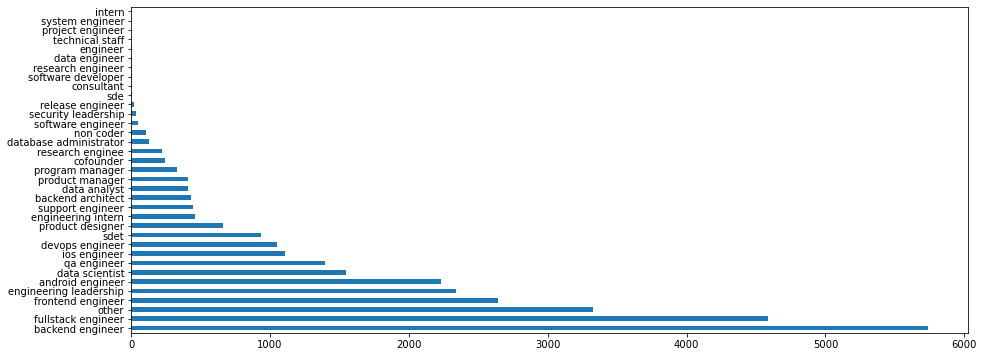

In [85]:
tdf["top_first"].value_counts().plot(kind="barh", figsize=(15,6))

<mark><strong>Top 2 positions are backend engineer and fullstack engineer</strong></mark>

# (E) Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data

- <mark><strong>Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data</strong></mark>
- `Unsupervised Learning - Clustering`
    - <mark>Checking clustering tendency</mark>
    - `Elbow method`
    - <mark>K-means clustering</mark>
    - `Hierarchical clustering (you can do this on a sample of the dataset if your process is taking time)`

In [86]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Designation,Class,Tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,4.0,1,1,3
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,1.0,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,5.0,2,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,2.0,3,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,2.0,1,1,3


In [87]:
df.shape

(140143, 10)

In [88]:
df["job_position"].nunique()

36

In [89]:
X = df.loc[:,["ctc","job_position","Years_of_Experience","Designation","Class","Tier"]]

In [90]:
X.head()

,ctc,job_position,Years_of_Experience,Designation,Class,Tier
0,1100000,other,4.0,1,1,3
1,449999,fullstack engineer,1.0,3,3,3
2,2000000,backend engineer,5.0,2,2,2
3,700000,backend engineer,2.0,3,3,3
4,1400000,fullstack engineer,2.0,1,1,3


In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [93]:
X_encoded = X.copy()

In [94]:
X_encoded["job_position"]=X_encoded["job_position"].map(dict(df["job_position"].value_counts()))

In [95]:
X_encoded

,ctc,job_position,Years_of_Experience,Designation,Class,Tier
0,1100000,16846,4.0,1,1,3
1,449999,23707,1.0,3,3,3
2,2000000,40070,5.0,2,2,2
3,700000,40070,2.0,3,3,3
4,1400000,23707,2.0,1,1,3
...,...,...,...,...,...,...
205324,1500000,23707,5.0,2,3,2
205326,1200000,23707,2.0,2,1,3
205327,1000000,4909,6.0,3,2,3
205328,1100000,4909,2.0,2,3,3


In [96]:
scaler = MinMaxScaler()

In [97]:
scaler.fit(X_encoded)

MinMaxScaler()

In [98]:
X_scaled = scaler.transform(X_encoded)

In [99]:
pd.DataFrame(X_scaled, columns=X.columns)

,ctc,job_position,Years_of_Experience,Designation,Class,Tier
0,0.185753,0.420183,0.08,0.0,0.0,1.0
1,0.064917,0.591477,0.02,1.0,1.0,1.0
2,0.353064,1.000000,0.10,0.5,0.5,0.5
3,0.111392,1.000000,0.04,1.0,1.0,1.0
4,0.241523,0.591477,0.04,0.0,0.0,1.0
...,...,...,...,...,...,...
140138,0.260113,0.591477,0.10,0.5,1.0,0.5
140139,0.204343,0.591477,0.04,0.5,0.0,1.0
140140,0.167162,0.122160,0.12,1.0,0.5,1.0
140141,0.185753,0.122160,0.04,0.5,1.0,1.0


### clustering tendency: pairplot

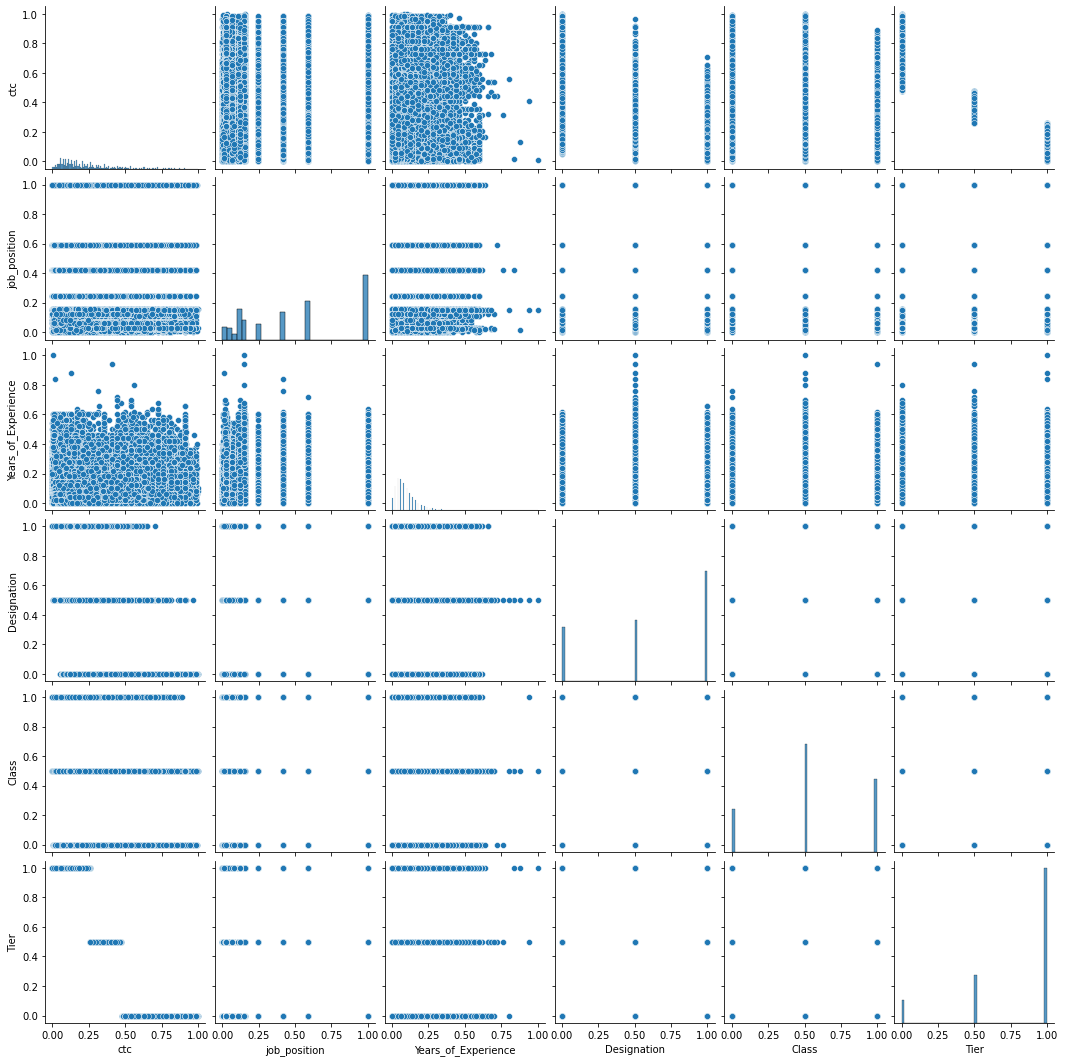

In [100]:
sns.pairplot(pd.DataFrame(X_scaled, columns=X.columns))

# (F) KMeans clustering

### clustering tendency: Elbow method

In [101]:
from sklearn.cluster import KMeans

In [102]:
wcss = []
for k in range(1, 10):
    model = KMeans(n_clusters = k)
    model.fit(X_scaled)
    wcss.append(model.inertia_)

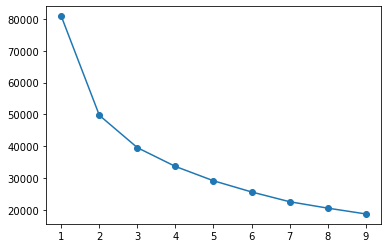

In [103]:
plt.plot(range(1, 10), wcss, '-o')

<mark><strong>k=3 possible clusters</strong></mark>

In [104]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [105]:
kmeans.predict(X_scaled)

array([1, 2, 1, ..., 0, 0, 0])

In [106]:
kmeans.labels_

array([1, 2, 1, ..., 0, 0, 0])

In [107]:
clusters = X.copy()

In [108]:
clusters["label"]=kmeans.labels_

In [109]:
clusters

,ctc,job_position,Years_of_Experience,Designation,Class,Tier,label
0,1100000,other,4.0,1,1,3,1
1,449999,fullstack engineer,1.0,3,3,3,2
2,2000000,backend engineer,5.0,2,2,2,1
3,700000,backend engineer,2.0,3,3,3,2
4,1400000,fullstack engineer,2.0,1,1,3,1
...,...,...,...,...,...,...,...
205324,1500000,fullstack engineer,5.0,2,3,2,2
205326,1200000,fullstack engineer,2.0,2,1,3,0
205327,1000000,data scientist,6.0,3,2,3,0
205328,1100000,data scientist,2.0,2,3,3,0


### description of cluster 0

In [110]:
clusters[clusters["label"]==0][["ctc","Years_of_Experience","Designation","Class","Tier"]].describe()

,ctc,Years_of_Experience,Designation,Class,Tier
count,5.702100e+04,57021.000000,57021.000000,57021.000000,57021.000000
mean,8.455696e+05,4.912313,2.538679,2.159994,2.916504
std,4.608955e+05,3.902943,0.586591,0.609255,0.287818
min,1.010000e+05,0.000000,1.000000,1.000000,1.000000
25%,5.000000e+05,2.000000,2.000000,2.000000,3.000000
50%,7.600000e+05,4.000000,3.000000,2.000000,3.000000
75%,1.080000e+06,6.000000,3.000000,3.000000,3.000000
max,3.500000e+06,50.000000,3.000000,3.000000,3.000000


### description of cluster 1

In [111]:
clusters[clusters["label"]==1][["ctc","Years_of_Experience","Designation","Class","Tier"]].describe()

,ctc,Years_of_Experience,Designation,Class,Tier
count,4.026000e+04,40260.000000,40260.000000,40260.000000,40260.000000
mean,2.446318e+06,6.055315,1.235097,1.670691,1.731446
std,9.419517e+05,4.653053,0.442074,0.666203,0.586500
min,4.700000e+05,0.000000,1.000000,1.000000,1.000000
25%,1.700000e+06,3.000000,1.000000,1.000000,1.000000
50%,2.200000e+06,5.000000,1.000000,2.000000,2.000000
75%,3.000000e+06,8.000000,1.000000,2.000000,2.000000
max,5.480000e+06,40.000000,3.000000,3.000000,3.000000


### description of cluster 2

In [112]:
clusters[clusters["label"]==2][["ctc","Years_of_Experience","Designation","Class","Tier"]].describe()

,ctc,Years_of_Experience,Designation,Class,Tier
count,4.286200e+04,42862.000000,42862.000000,42862.000000,42862.000000
mean,7.671034e+05,3.751761,2.804162,2.529327,2.949536
std,3.982345e+05,3.054702,0.399135,0.607971,0.218904
min,1.008000e+05,0.000000,1.000000,1.000000,2.000000
25%,4.300000e+05,2.000000,3.000000,2.000000,3.000000
50%,7.000000e+05,3.000000,3.000000,3.000000,3.000000
75%,1.030000e+06,5.000000,3.000000,3.000000,3.000000
max,2.600000e+06,32.000000,3.000000,3.000000,3.000000


In [127]:
clusters["label"].value_counts(normalize=True)

0    0.406877
2    0.305845
1    0.287278
Name: label, dtype: float64

# (G) Hierarchical clusterinng

In [113]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Designation,Class,Tier
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,4.0,1,1,3
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,1.0,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,5.0,2,2,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,2.0,3,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,2.0,1,1,3


In [114]:
col_agg = {"ctc":"median","job_position":"max","Years_of_Experience":"mean","Designation":"mean","Class":"mean","Tier":"mean"}

In [115]:
df_new = df.groupby(["job_position"]).aggregate(col_agg); df_new.head()

,ctc,job_position,Years_of_Experience,Designation,Class,Tier
job_position,,,,,,
android engineer,900000.0,android engineer,5.147065,2.241791,2.059701,2.714030
backend architect,2600000.0,backend architect,10.617801,2.235602,2.076789,1.706806
backend engineer,1200000.0,backend engineer,4.380584,2.248615,2.176741,2.487147
cofounder,1200000.0,cofounder,6.221498,2.205212,2.016287,2.374593
consultant,1200000.0,consultant,7.568627,2.117647,2.078431,2.490196


In [116]:
df_new["job_position"]=df_new["job_position"].map(dict(df["job_position"].value_counts()))

In [117]:
df_new.head()

,ctc,job_position,Years_of_Experience,Designation,Class,Tier
job_position,,,,,,
android engineer,900000.0,5025,5.147065,2.241791,2.059701,2.714030
backend architect,2600000.0,1146,10.617801,2.235602,2.076789,1.706806
backend engineer,1200000.0,40070,4.380584,2.248615,2.176741,2.487147
cofounder,1200000.0,307,6.221498,2.205212,2.016287,2.374593
consultant,1200000.0,51,7.568627,2.117647,2.078431,2.490196


In [118]:
minmax_scale = MinMaxScaler()

In [119]:
minmax_scale.fit(df_new)

MinMaxScaler()

In [120]:
X_new = pd.DataFrame(minmax_scale.transform(df_new), columns=df_new.columns, index=df_new.index)

In [121]:
X_new.head()

,ctc,job_position,Years_of_Experience,Designation,Class,Tier
job_position,,,,,,
android engineer,0.227273,0.125056,0.379900,0.964016,0.325892,0.787321
backend architect,1.000000,0.028212,0.877812,0.944169,0.396768,0.000000
backend engineer,0.363636,1.000000,0.310140,0.985899,0.811351,0.609973
cofounder,0.363636,0.007265,0.477688,0.846713,0.145815,0.521992
consultant,0.363636,0.000874,0.600296,0.565909,0.403581,0.612356


In [122]:
import scipy.cluster.hierarchy as sch

Z = sch.linkage(X_new, method='ward', metric='euclidean')

Text(0, 0.5, 'distance')

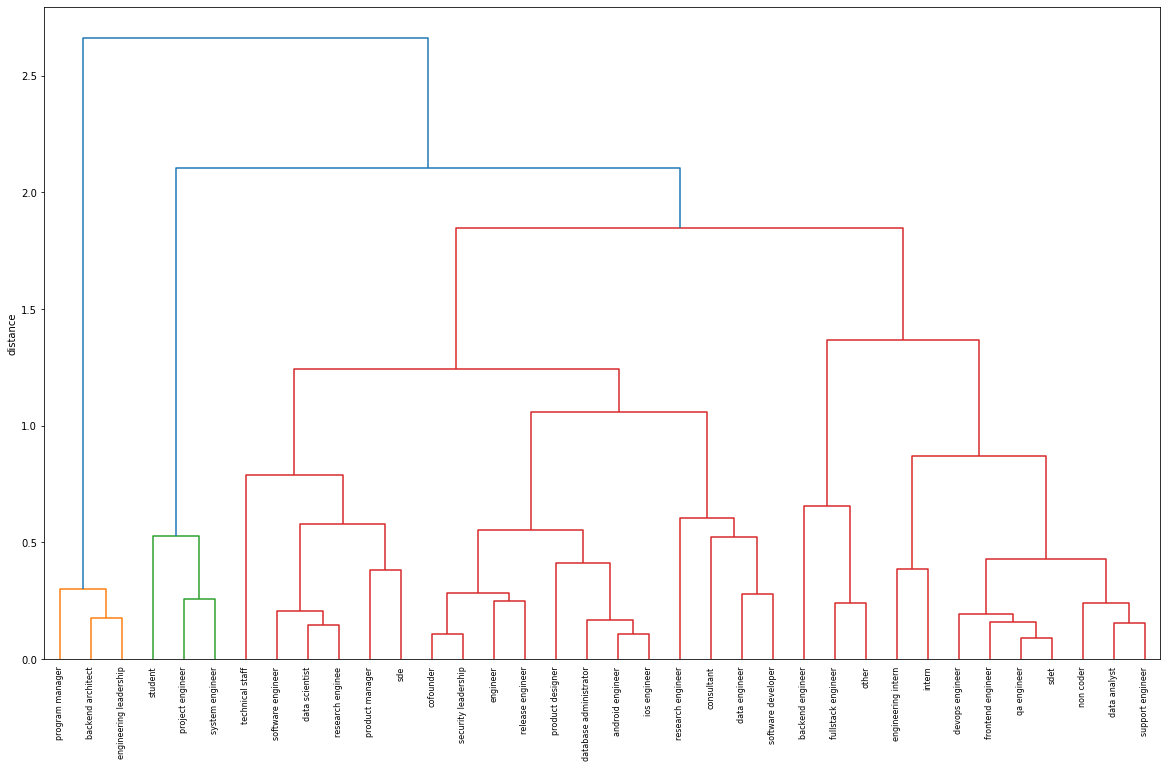

In [123]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=X_new.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

# (H) observations and Recommendations

In [128]:
clusters["label"].value_counts(normalize=True)

0    0.406877
2    0.305845
1    0.287278
Name: label, dtype: float64

**observations from Kmeans clustering:**
1. 40.68% people with median 4 years of experience are in cluster 0
2. 28.72% people with median 5 years of experience are in cluster 1
3. 30.58% people with median 3 years of experience are in cluster 2

1. **approx 9.9% companies are Tier 1**
2. **approx 21.45% companies are Tier 2**
3. **approx 68.57% companies are Tier 3**
4. **Top 2 positions are backend engineer and fullstack engineer**
5. **Recommendation:**
    - **since 68.57% companies are Tier3, employees from these Tier3 companies will have higher chances to enroll for scaler programme and change their domain from non-IT to IT.**
    - **and employees from Tier2 companies will mostly enroll for skill up in their current domain**